In [3]:
import spacy
from spacy.lang.en import English
import networkx as nx
import matplotlib.pyplot as plt

In [32]:
raw_text = 'Hello, world. Here are two sentences. We have three phrases.'
nlp = English()
nlp.create_pipe('sentencizer')
nlp.add_pipe('sentencizer') # updated
doc = nlp(raw_text)
sentences = [sent.text.strip() for sent in doc.sents]
print(sentences)

['Hello, world.', 'Here are two sentences.', 'We have three phrases.']


In [4]:
def getSentences(text):
    """
    Split paragraph into seperate sentences stored in a list
    Argument:
      -- text: string - paragraph
    Return:
      -- a list of seperated sentences
    """
    nlp = English()
    nlp.create_pipe('sentencizer')
    nlp.add_pipe('sentencizer')
    document = nlp(text)
    return [sent.text.strip() for sent in document.sents]

def printToken(token):
    """
    Print token and part of speech
    """
    print(token.text, "->", token.dep_)

def appendChunk(original, chunk):
    return original + ' ' + chunk

def isRelationCandidate(token):
    deps = ["ROOT", "adj", "attr", "agent", "amod"]
    # check if Syntactic dependency of word in deps
    return any(subs in token.dep_ for subs in deps)

def isConstructionCandidate(token):
    deps = ["compound", "prep", "conj", "mod"]
    # check if Syntactic dependency of word in deps
    return any(subs in token.dep_ for subs in deps)

def processSubjectObjectPairs(tokens):
    subject = ''
    object = ''
    relation = ''
    subjectConstruction = ''
    objectConstruction = ''
    for token in tokens: # Iterate over each word
        printToken(token)
        if "punct" in token.dep_:
            continue
        if isRelationCandidate(token):
            relation = appendChunk(relation, token.lemma_)
        if isConstructionCandidate(token):
            if subjectConstruction:
                subjectConstruction = appendChunk(subjectConstruction, token.text)
            if objectConstruction:
                objectConstruction = appendChunk(objectConstruction, token.text)
        if "subj" in token.dep_:
            subject = appendChunk(subject, token.text)
            subject = appendChunk(subjectConstruction, subject)
            subjectConstruction = ''
        if "obj" in token.dep_:
            object = appendChunk(object, token.text)
            object = appendChunk(objectConstruction, object)
            objectConstruction = ''

    print (subject.strip(), ",", relation.strip(), ",", object.strip())
    return (subject.strip(), relation.strip(), object.strip())

def processSentence(sentence):
    tokens = nlp_model(sentence) # Spacy processes sentence
    return processSubjectObjectPairs(tokens)

def printGraph(triples):
    G = nx.Graph()
    for triple in triples:
        G.add_node(triple[0])
        G.add_node(triple[1])
        G.add_node(triple[2])
        G.add_edge(triple[0], triple[1])
        G.add_edge(triple[1], triple[2])

    pos = nx.spring_layout(G)
    plt.figure(figsize=(14,6))
    nx.draw(G, pos, edge_color='black', width=1, linewidths=1,
            node_size=500, node_color='seagreen', alpha=0.9,
            labels={node: node for node in G.nodes()})
    plt.axis('off')
    plt.show()

In [12]:
text = "London is the capital and largest city of England and the United Kingdom. Standing on the River " \
       "Thames in the south-east of England, at the head of its 50-mile (80 km) estuary leading to " \
           "the North Sea, London has been a major settlement for two millennia. " \
           "Londinium was founded by the Romans. The City of London, " \
           "London's ancient core − an area of just 1.12 square miles (2.9 km2) and colloquially known as " \
           "the Square Mile − retains boundaries that follow closely its medieval limits." \
           "The City of Westminster is also an Inner London borough holding city status. " \
           "Greater London is governed by the Mayor of London and the London Assembly." \
           "London is located in the southeast of England." \
           "Westminster is located in London." \
           "London is the biggest city in Britain. London has a population of 7,172,036."
text1 = "London is the biggest city in Britain. London has a population of 7,172,036."
sentences = getSentences(text1)
sentences

['London is the biggest city in Britain.',
 'London has a population of 7,172,036.']

In [ ]:
nlp_model = spacy.load('en_core_web_sm')

In [16]:
doc = nlp_model('London has a population of 7,172,036.')
print(doc.text)
for token in doc:
    # print(token Words, Part-of-speech, Syntactic dependency)
    print(token.text, token.pos_, token.dep_)

London has a population of 7,172,036.
London PROPN nsubj
has VERB ROOT
a DET det
population NOUN dobj
of ADP prep
7,172,036 NUM pobj
. PUNCT punct


London is the biggest city in Britain. London has a population of 7,172,036.
London -> nsubj
is -> ROOT
the -> det
biggest -> amod
city -> attr
in -> prep
Britain -> pobj
. -> punct
London , be big city , Britain
London -> nsubj
has -> ROOT
a -> det
population -> dobj
of -> prep
7,172,036 -> pobj
. -> punct
London , have , population 7,172,036


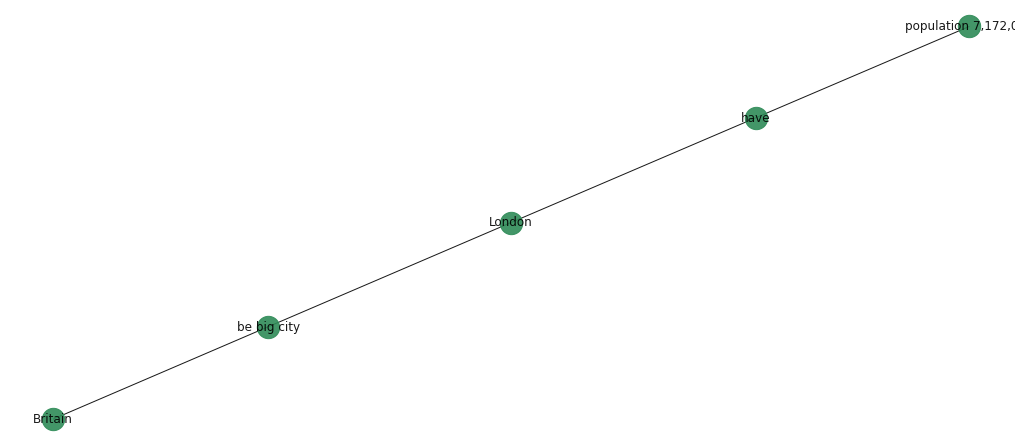

In [7]:
triples = []
print (text1)
for sentence in sentences: # Iterate sentences
    triples.append(processSentence(sentence))
printGraph(triples)